In [43]:
import numpy as np
import pandas as pd
import re
train_data = pd.read_json('/Users/vaibhavgupta/gatom/gatom-ml/data/hotstar_dataset/train_data.json',orient='index')
train_data.head()

,cities,dow,genres,segment,titles,tod
train-121672,"delhi:3492,mumbai:64","5:482,4:3008,7:64","Drama:6,Cricket:3469,Wildlife:79",neg,"Wild Sex:79,Vintage Dhoni Comes Good with 134:...","18:1372,21:1862,17:320"
train-121673,"ahmedabad:56666,mumbai:26989","1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","Drama:48949,Family:9927,Crime:1901,Romance:165...",neg,"Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936..."
train-121670,navi mumbai:29400,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",neg,"India vs Australia 1st Test Hindi:83,India vs ...","11:302,10:1594,13:331,12:133,20:3802,14:3083,2..."
train-121671,"chennai:77,navi mumbai:4005,mumbai:0","1:77,2:3883,5:122","Romance:77,Drama:122,Cricket:3883",neg,"Rangoon:77,India A vs England XI:3883,Kaabil:122","10:122,12:77,15:1800,14:0,16:2083"
train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864","1:6150,3:2378",TalkShow:8529,pos,Koffee With Karan:8529,"20:529,21:1257,22:4930,23:538,19:1268,18:6"


In [45]:
train_data['g1'] = [re.sub(pattern='\:\d+',repl='',string=x) for x in train_data['genres']]
train_data['g1'] = train_data['g1'].apply(lambda x: x.split(','))
t1 = pd.Series(train_data['g1']).apply(frozenset).to_frame(name='t_genre')
genreSet = frozenset.union(*t1.t_genre)
t1

,t_genre
train-121672,"(Drama, Cricket, Wildlife)"
train-121673,"(Crime, Drama, Action, Comedy, Family, Romance)"
train-121670,"(LiveTV, Drama, Action, Cricket, Comedy, Family)"
train-121671,"(Drama, Cricket, Romance)"
train-121676,(TalkShow)
train-121677,(TalkShow)
train-121674,"(Crime, LiveTV, Drama, Wildlife, Cricket, Comedy)"
train-121675,"(Cricket, Reality, Romance)"
train-121678,"(Drama, Cricket, Comedy)"
train-121679,(Family)


In [11]:
def string_genres_time(genre, string):
 if genre in string:
   prbmStr = string[string.index(genre) :]
   #print(prbmStr)
   problemStr = prbmStr[prbmStr.index(':')+1:]
   #print(problemStr)
   #print(problemStr.index(','))
   if ',' in problemStr:
     return int(problemStr[0:problemStr.index(',')])
   else:
     return int(problemStr[0:])
 else:
   return 0

In [12]:
def string_dow_time(genre, string):
 if genre in string:
   prbmStr = string[string.index(genre) :]
   #print(prbmStr)
   problemStr = prbmStr[prbmStr.index(':')+1:]
   #print(problemStr)
   #print(problemStr.index(','))
   if ',' in problemStr:
     return int(problemStr[0:problemStr.index(',')])
   else:
     return int(problemStr[0:])
 else:
   return 0

In [13]:
def string_tod_time(genre, string):
    if genre in string:
        prbmStr = string[string.index(genre) :]
        #print(prbmStr)
        problemStr = prbmStr[prbmStr.index(':')+1:]
        #print(problemStr)
        #print(problemStr.index(','))
        if ',' in problemStr:
            return int(problemStr[0:problemStr.index(',')])
        else:
            return int(problemStr[0:])
    else:
        todData = genre[1:]
        if todData in string:
            if string.index(todData) == 0:
                prbmStr = string[string.index(todData) :]
                #print(prbmStr)
                problemStr = prbmStr[prbmStr.index(':')+1:]
                #print(problemStr)
                #print(problemStr.index(','))
                if ',' in problemStr:
                    return int(problemStr[0:problemStr.index(',')])
                else:
                    return int(problemStr[0:])
            else:
                return 0
        else:
            return 0

In [14]:
for i in genreSet:
  train_data[i] = train_data["genres"].apply(lambda x : string_genres_time(i, x))

In [15]:
for i in np.arange(1,8):
  str_i = str(i) + ':'
  train_data[i] = train_data["dow"].apply(lambda x : string_dow_time(str_i, x))

In [16]:
for i in np.arange(0,24):
  str_i = ','+str(i)+':'
  colName = 'tod_'+str(i)
  train_data[colName] = train_data["tod"].apply(lambda x : string_genres_time(str_i, x))

In [17]:
train_data.head().T

,train-121672,train-121673,train-121670,train-121671,train-121676
cities,"delhi:3492,mumbai:64","ahmedabad:56666,mumbai:26989",navi mumbai:29400,"chennai:77,navi mumbai:4005,mumbai:0","bangalore:5135,krishnarajapura:529,hosur:2864"
dow,"5:482,4:3008,7:64","1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","1:77,2:3883,5:122","1:6150,3:2378"
genres,"Drama:6,Cricket:3469,Wildlife:79","Drama:48949,Family:9927,Crime:1901,Romance:165...","Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...","Romance:77,Drama:122,Cricket:3883",TalkShow:8529
segment,neg,neg,neg,neg,pos
titles,"Wild Sex:79,Vintage Dhoni Comes Good with 134:...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","India vs Australia 1st Test Hindi:83,India vs ...","Rangoon:77,India A vs England XI:3883,Kaabil:122",Koffee With Karan:8529
tod,"18:1372,21:1862,17:320","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...","10:122,12:77,15:1800,14:0,16:2083","20:529,21:1257,22:4930,23:538,19:1268,18:6"
g1,"[Drama, Cricket, Wildlife]","[Drama, Family, Crime, Romance, Action, Comedy]","[Cricket, Family, Drama, LiveTV, Action, Comedy]","[Romance, Drama, Cricket]",[TalkShow]
Awards,0,0,0,0,0
Action,0,2064,14,0,0
Athletics,0,0,0,0,0


In [18]:
train_data.drop(['g1','tod','dow','genres'],inplace=True,axis=1)

In [19]:
train_data_backup = train_data.copy()

In [20]:
train_data.drop(['titles','cities'],inplace=True,axis=1)

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, train-121672 to train-126328
Data columns (total 67 columns):
segment         200000 non-null object
Awards          200000 non-null int64
Action          200000 non-null int64
Athletics       200000 non-null int64
Formula1        200000 non-null int64
Kids            200000 non-null int64
Thriller        200000 non-null int64
Teen            200000 non-null int64
FormulaE        200000 non-null int64
Family          200000 non-null int64
NA              200000 non-null int64
Science         200000 non-null int64
Romance         200000 non-null int64
Crime           200000 non-null int64
Table Tennis    200000 non-null int64
LiveTV          200000 non-null int64
IndiaVsSa       200000 non-null int64
Mythology       200000 non-null int64
Reality         200000 non-null int64
Comedy          200000 non-null int64
Volleyball      200000 non-null int64
Drama           200000 non-null int64
Kabaddi         200000 non-null int64
Ba

In [22]:
train_data.segment.unique()

array(['neg', 'pos'], dtype=object)

In [23]:
train_data.segment.replace('neg',0,inplace=True)

In [24]:
train_data.segment.replace('pos',1,inplace=True)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, train-121672 to train-126328
Data columns (total 67 columns):
segment         200000 non-null int64
Awards          200000 non-null int64
Action          200000 non-null int64
Athletics       200000 non-null int64
Formula1        200000 non-null int64
Kids            200000 non-null int64
Thriller        200000 non-null int64
Teen            200000 non-null int64
FormulaE        200000 non-null int64
Family          200000 non-null int64
NA              200000 non-null int64
Science         200000 non-null int64
Romance         200000 non-null int64
Crime           200000 non-null int64
Table Tennis    200000 non-null int64
LiveTV          200000 non-null int64
IndiaVsSa       200000 non-null int64
Mythology       200000 non-null int64
Reality         200000 non-null int64
Comedy          200000 non-null int64
Volleyball      200000 non-null int64
Drama           200000 non-null int64
Kabaddi         200000 non-null int64
Bad

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
train_data_count = train_data.copy()

In [28]:
train_data_count[train_data_count !=0 ] = 1

In [29]:
train_data_count['genre_counts'] = train_data_count[list(genreSet)].sum(axis=1)

In [30]:
train_data_count['genre_counts'].value_counts()

2     56332
3     39742
1     33047
4     26489
5     17220
6     11085
7      6883
8      4110
9      2290
10     1350
11      724
12      350
13      195
14      102
15       48
16       22
17        7
19        2
18        1
22        1
Name: genre_counts, dtype: int64

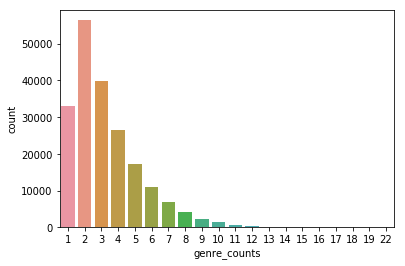

In [31]:
sns.countplot(train_data_count['genre_counts'])

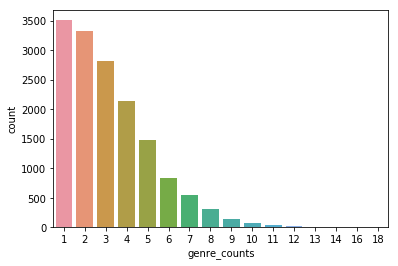

In [32]:
sns.countplot(train_data_count['genre_counts'][train_data_count['segment'] == 1])

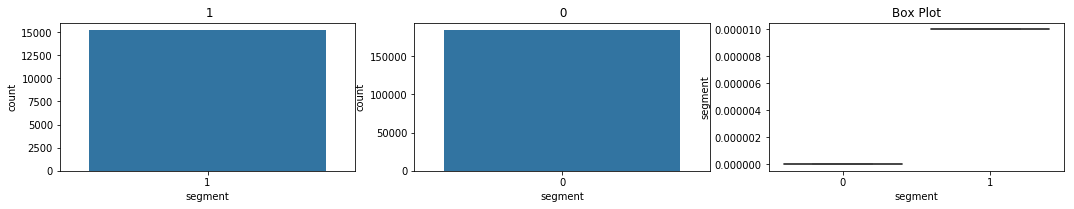

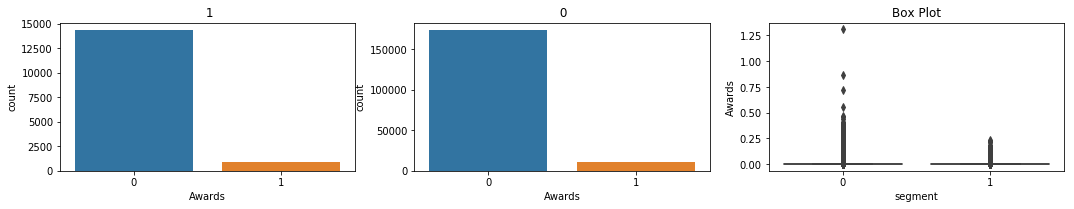

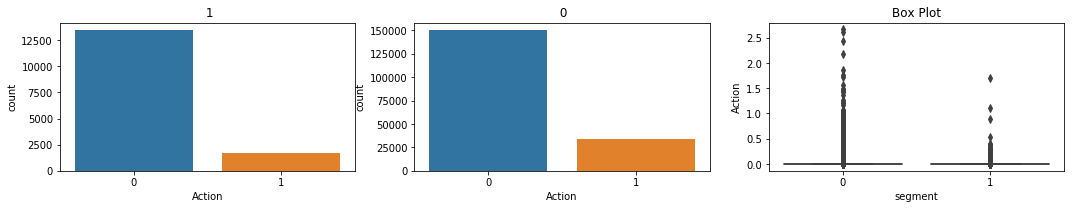

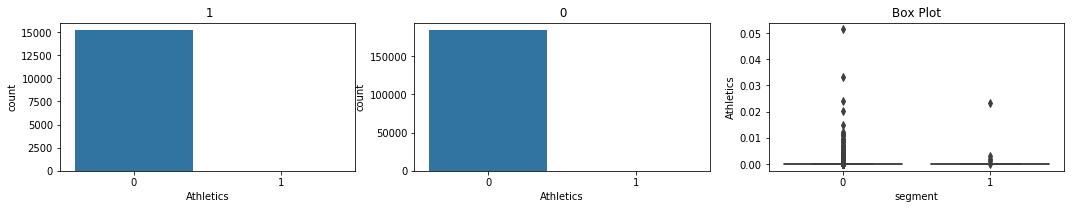

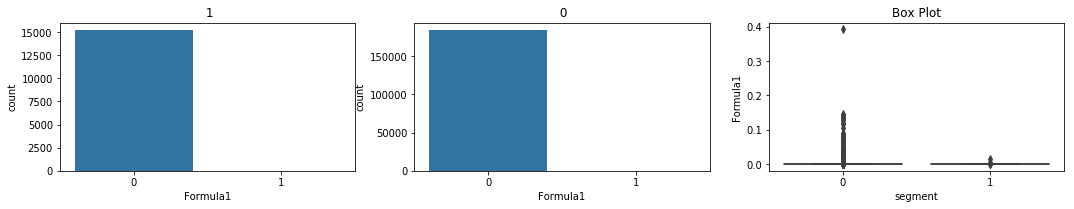

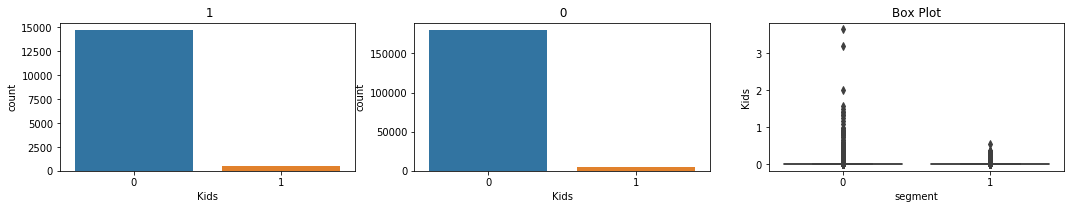

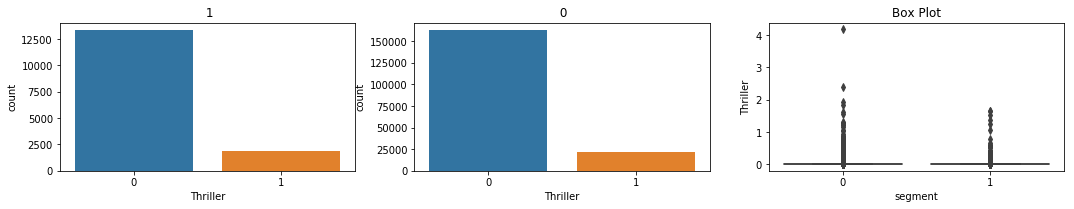

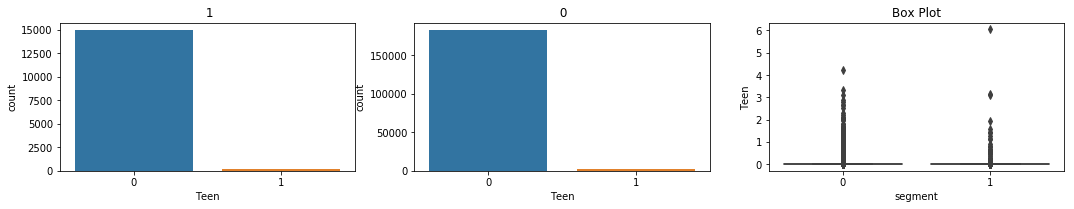

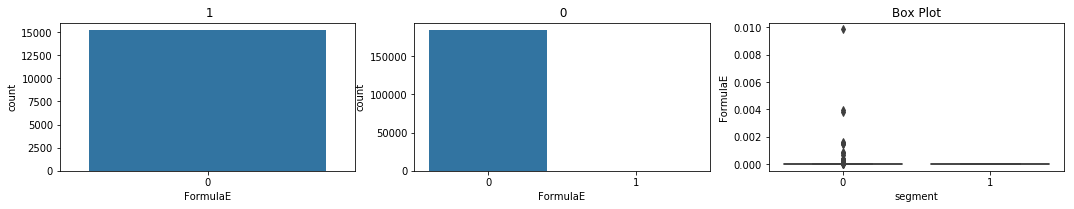

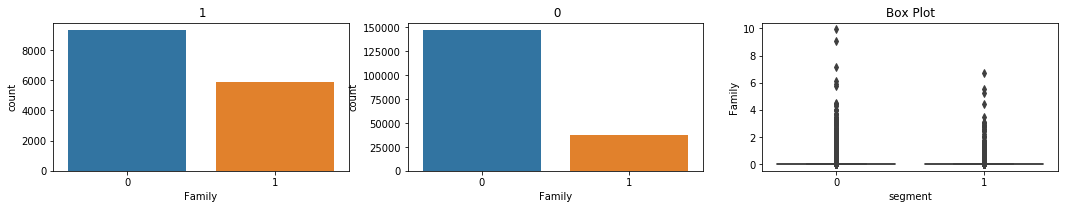

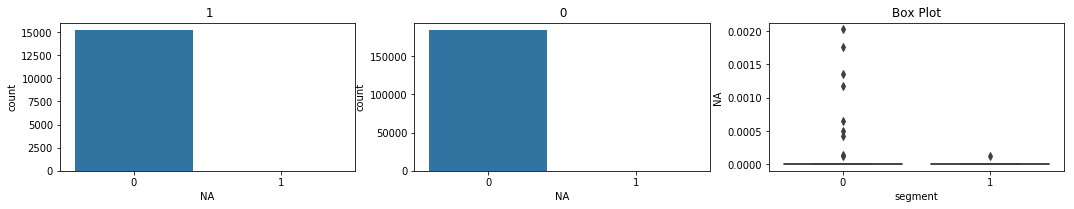

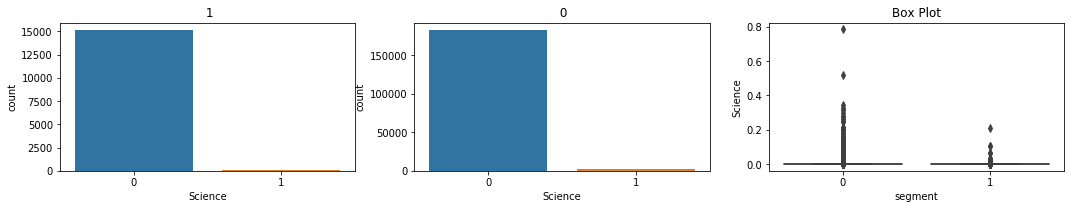

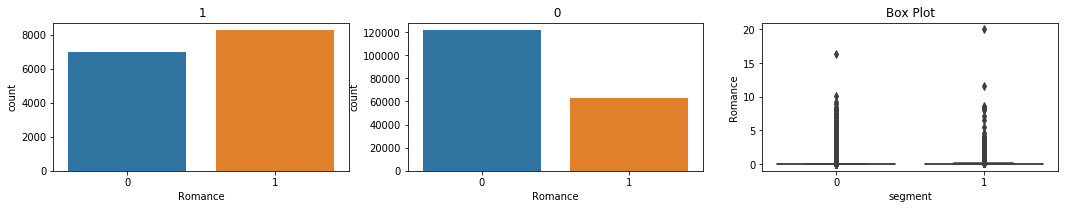

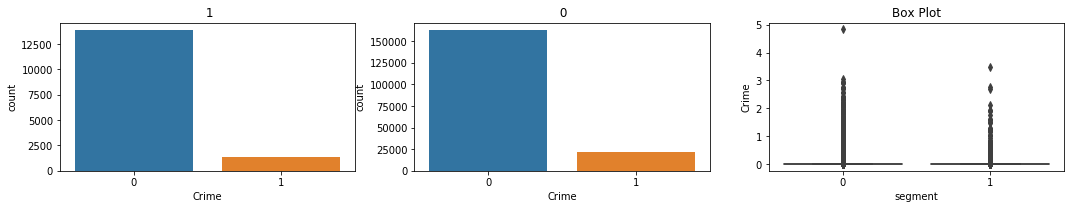

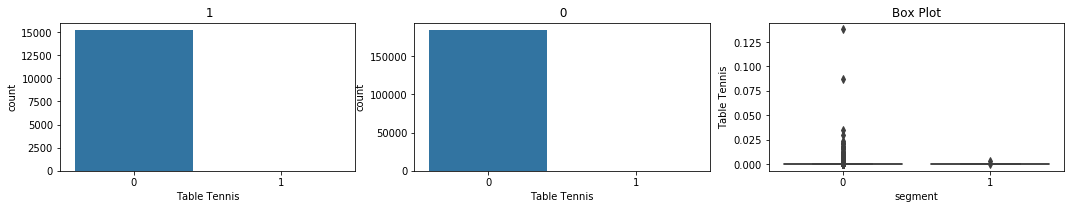

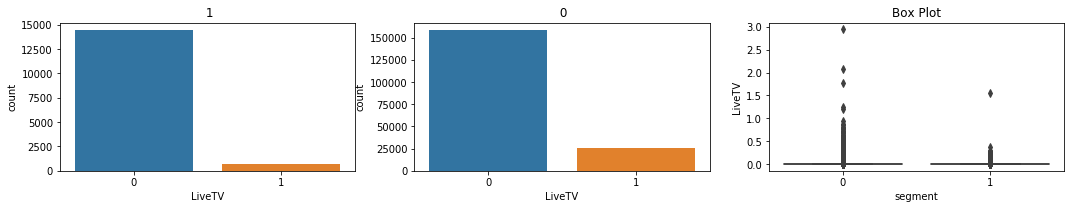

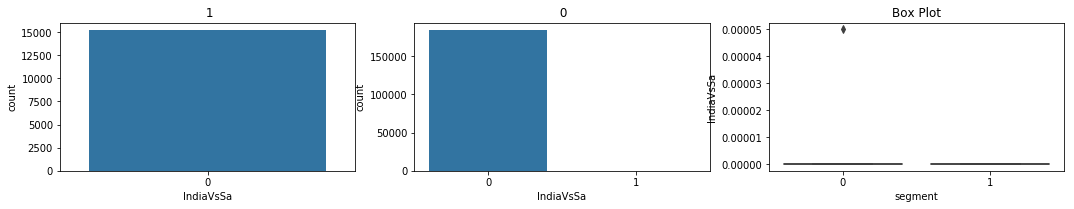

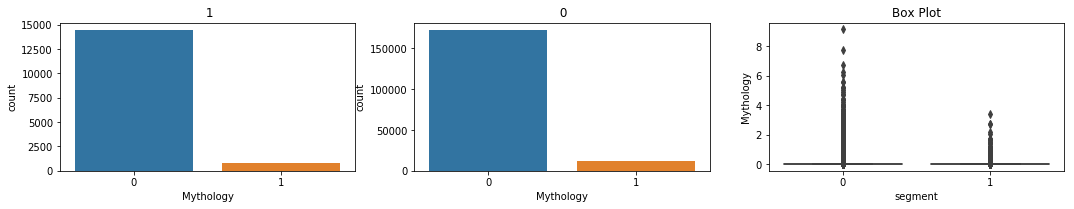

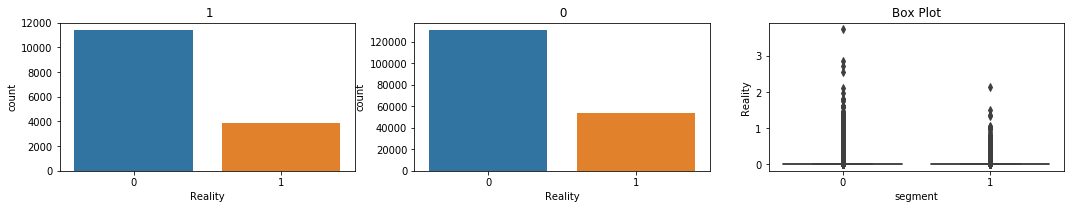

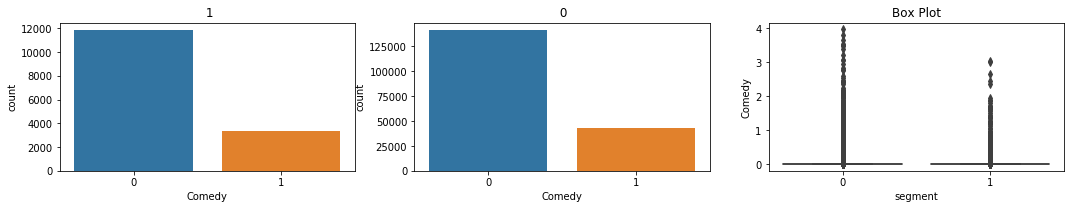

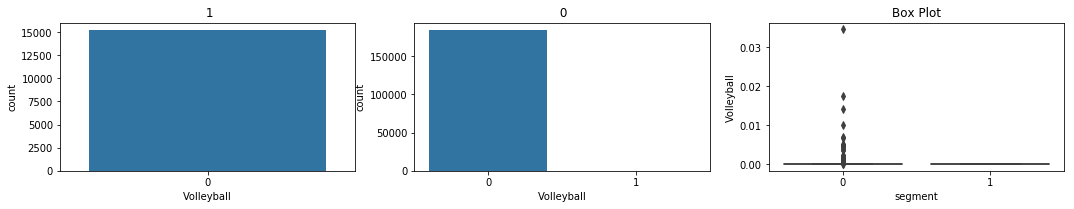

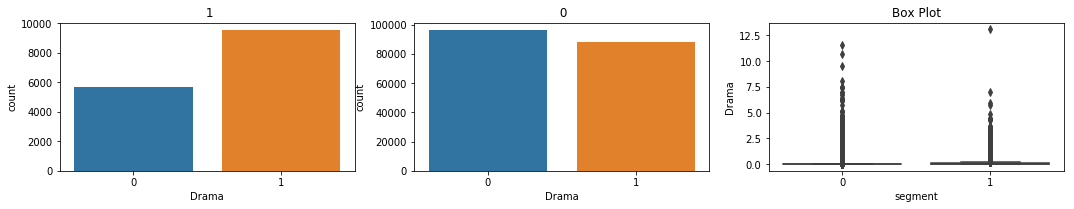

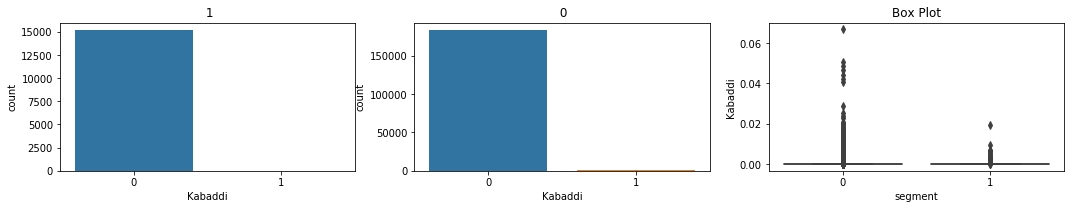

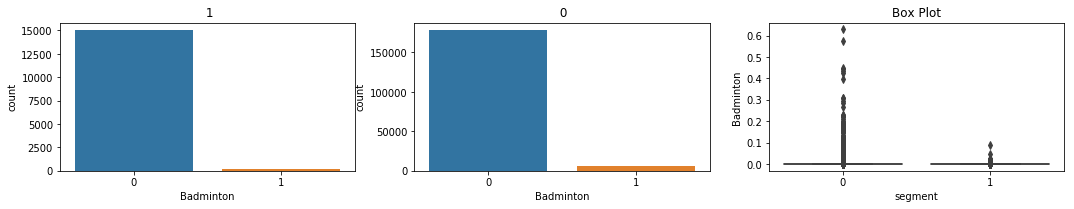

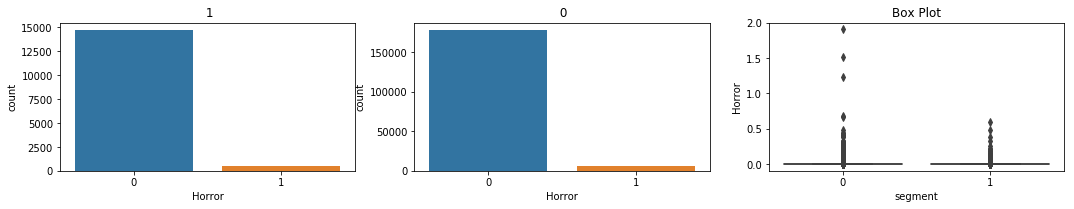

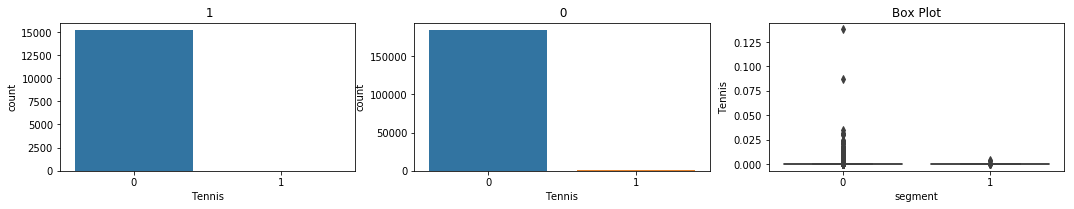

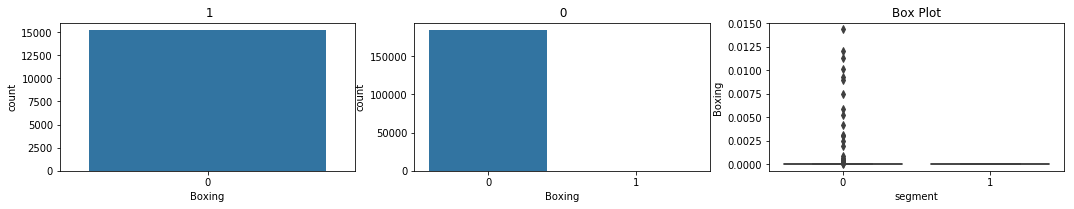

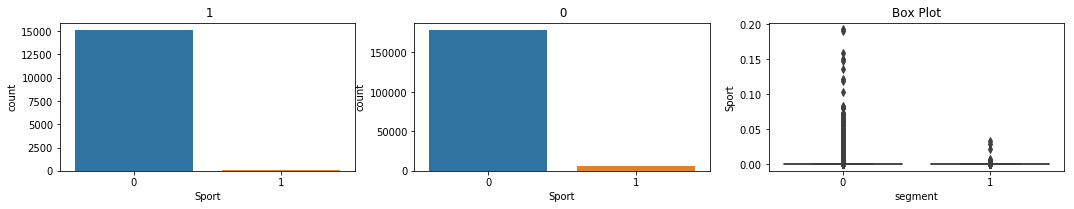

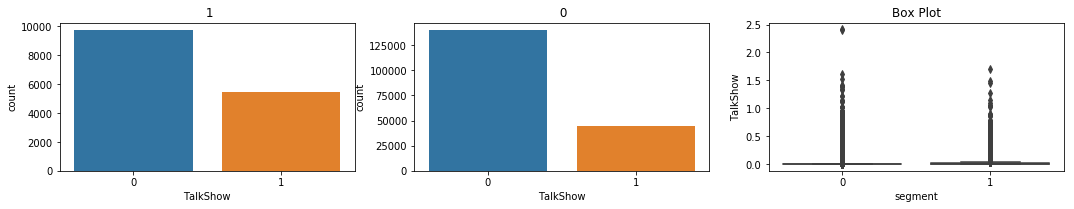

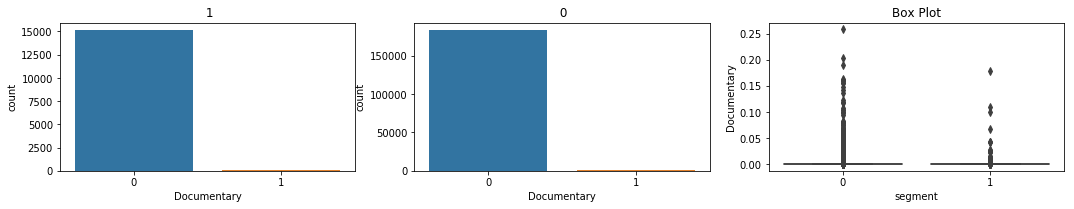

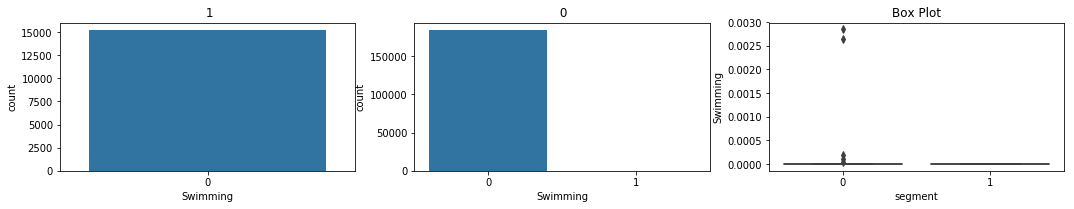

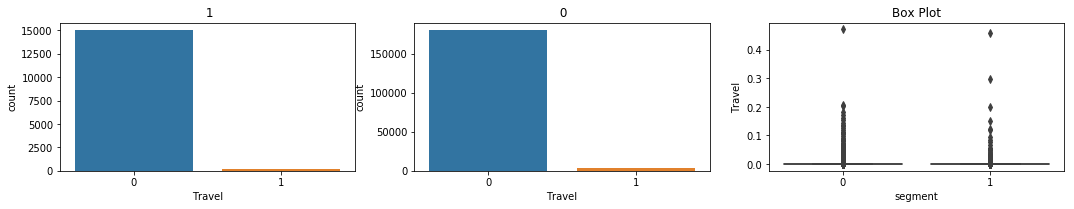

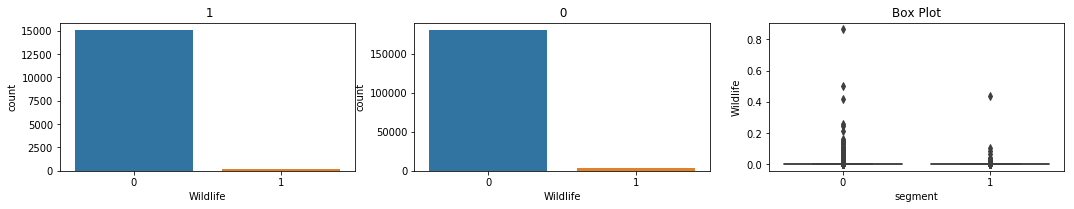

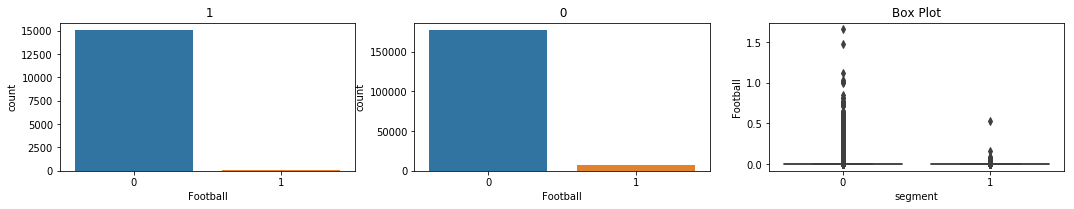

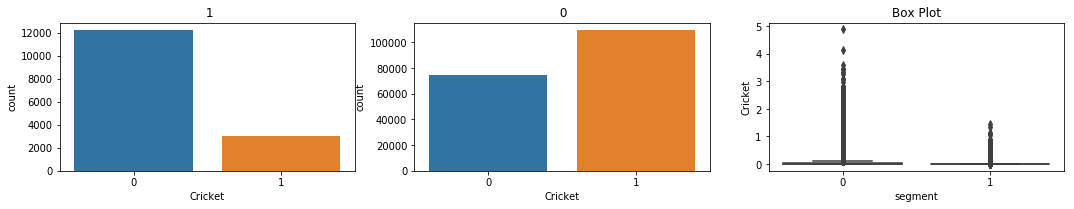

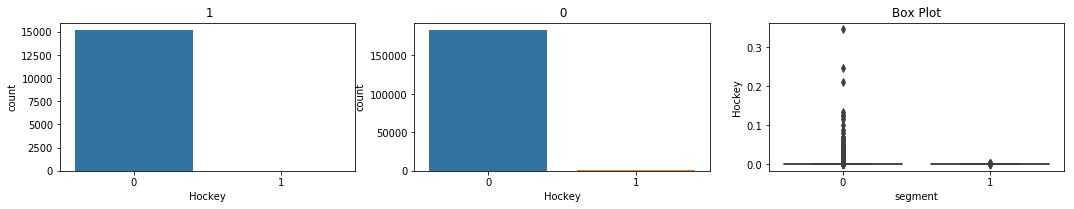

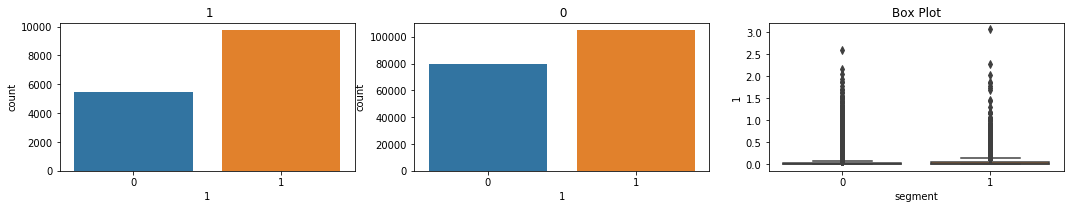

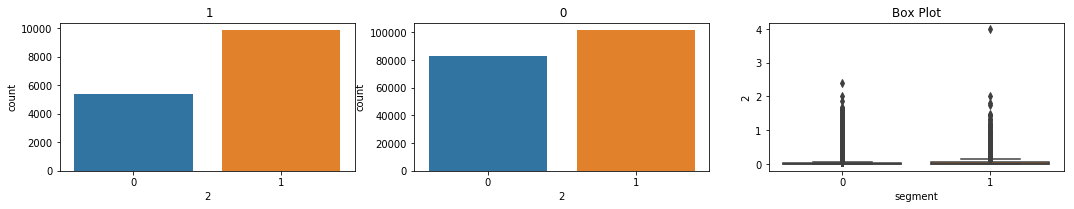

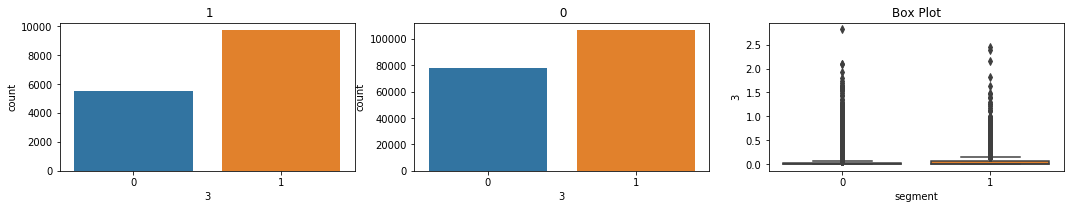

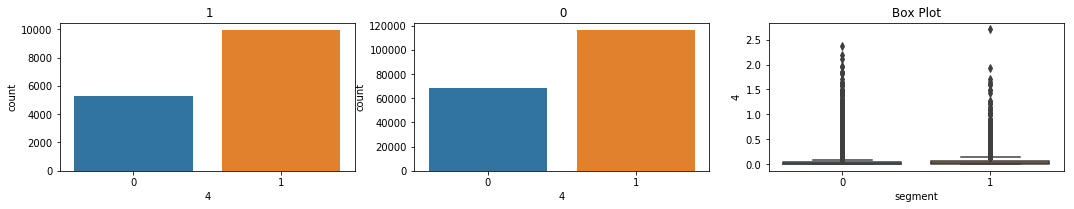

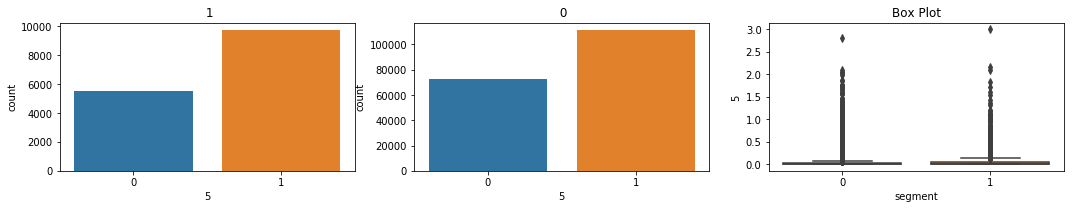

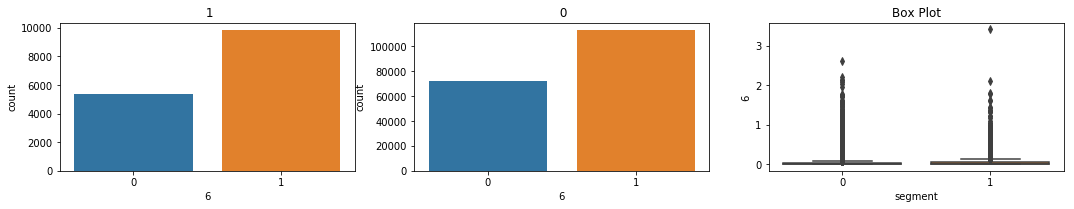

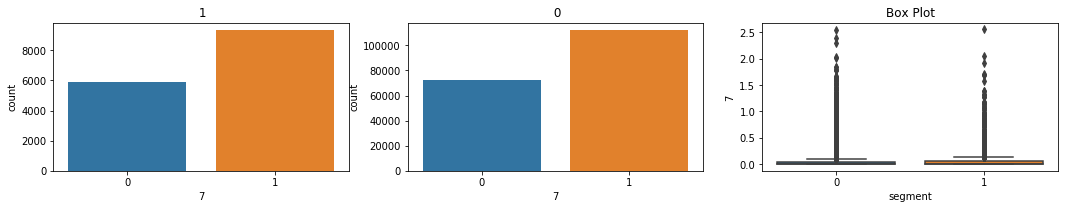

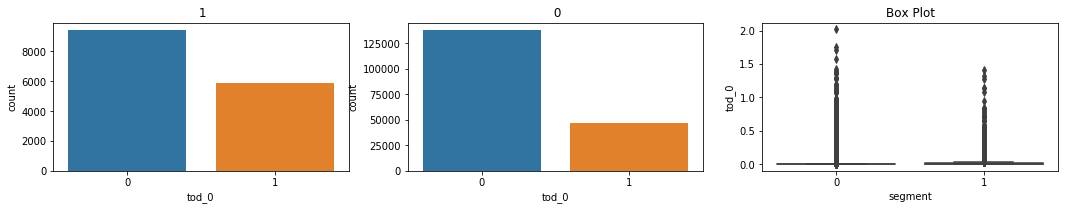

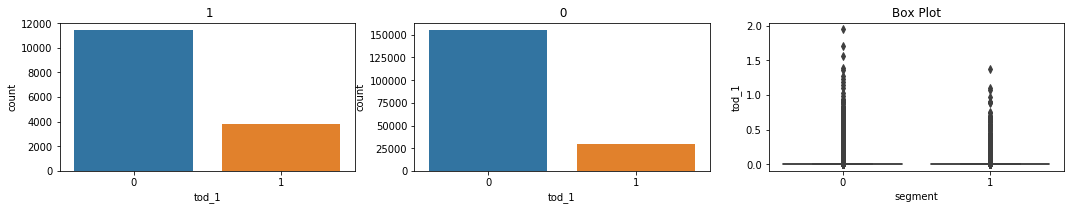

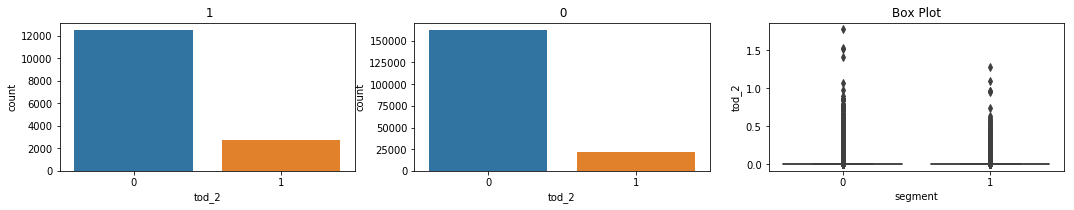

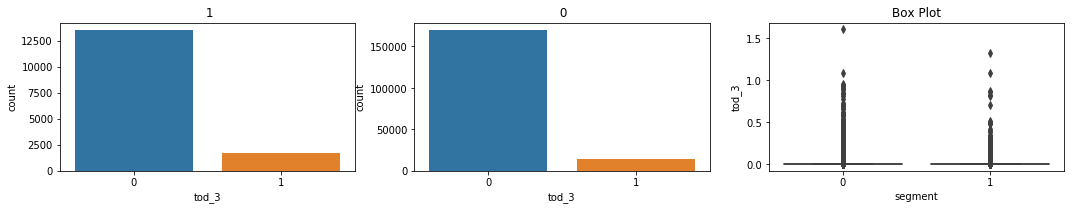

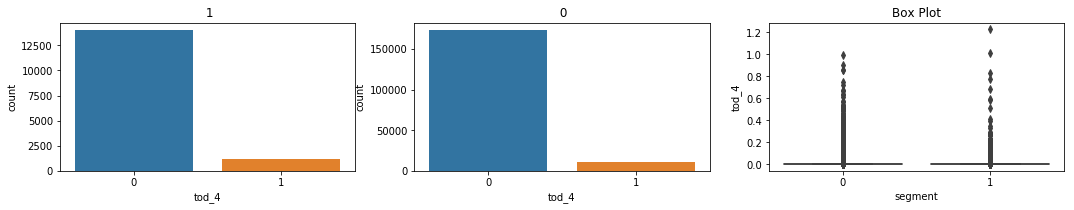

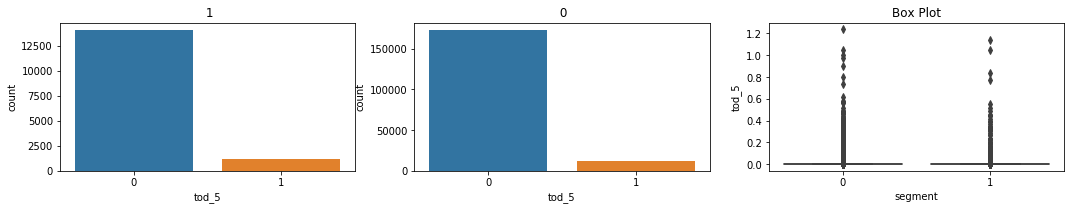

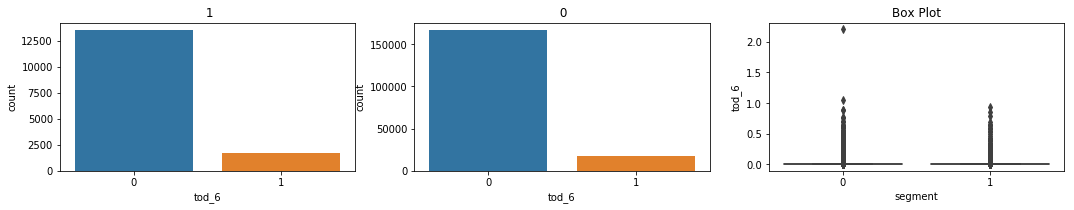

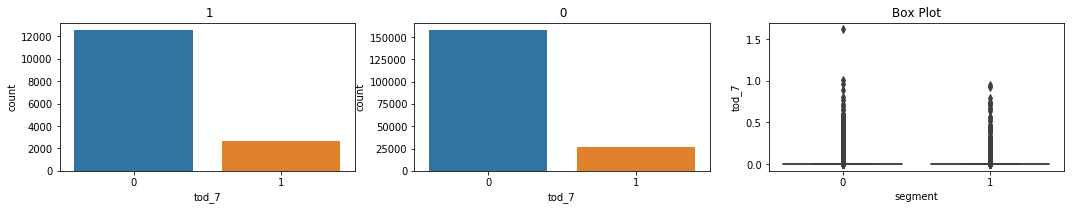

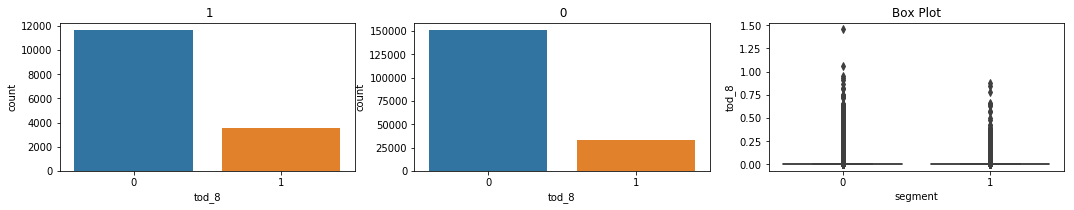

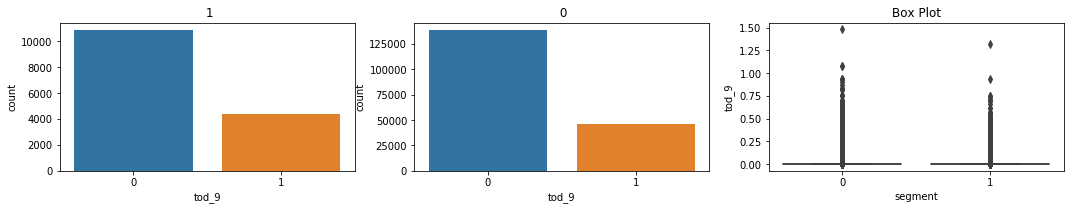

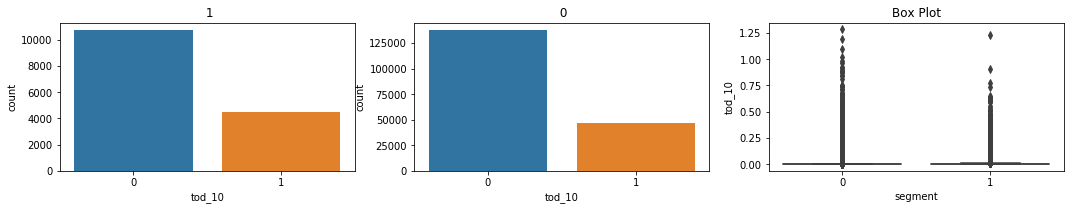

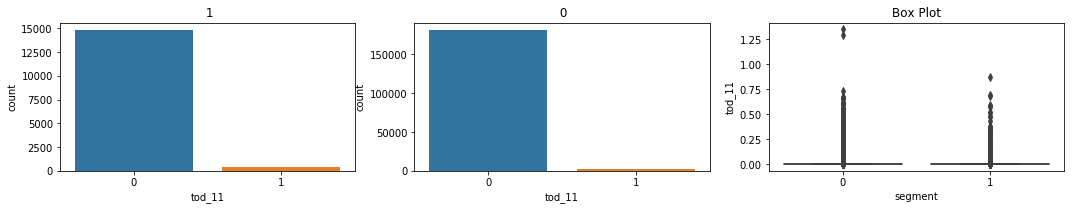

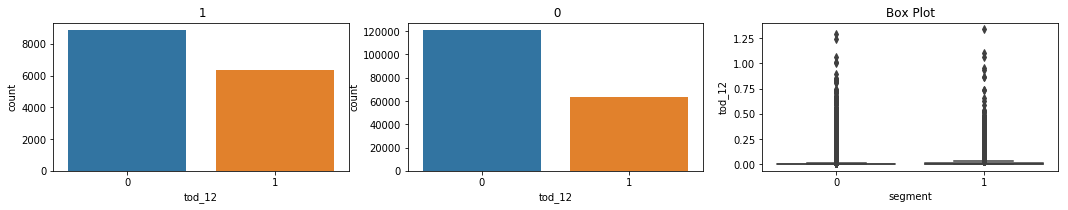

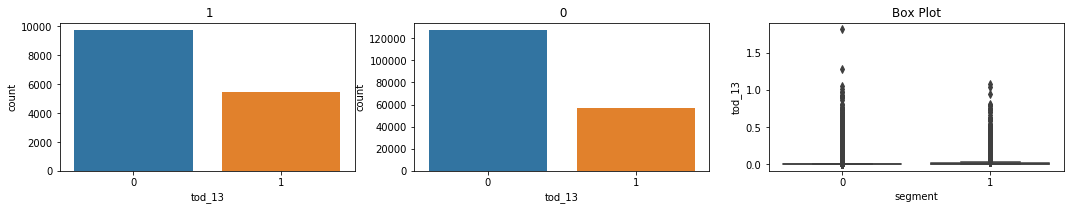

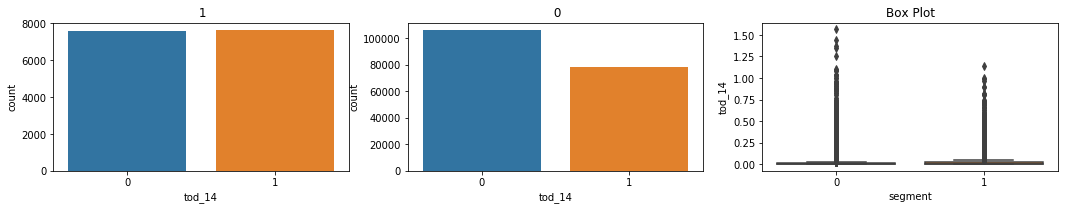

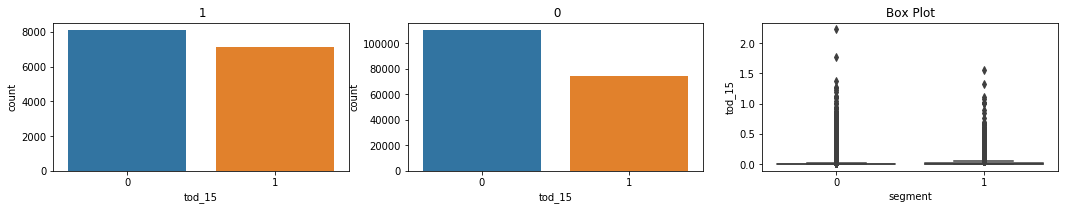

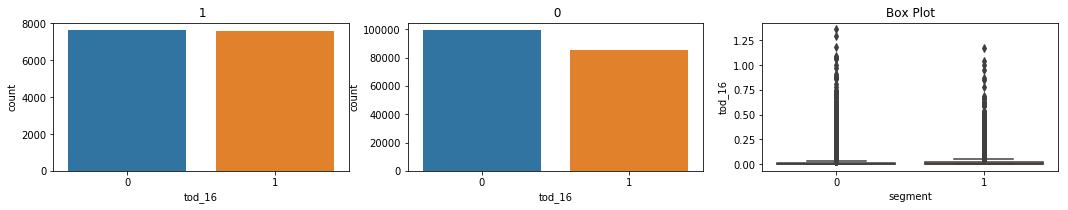

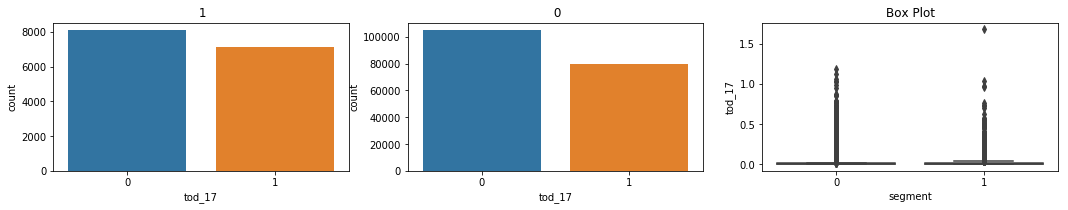

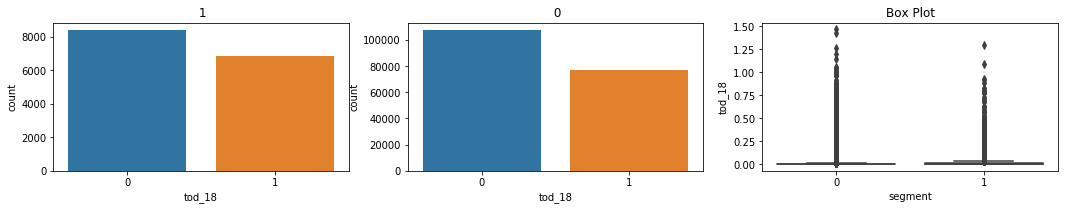

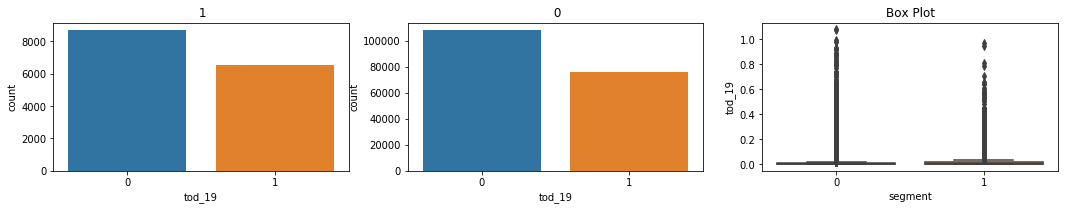

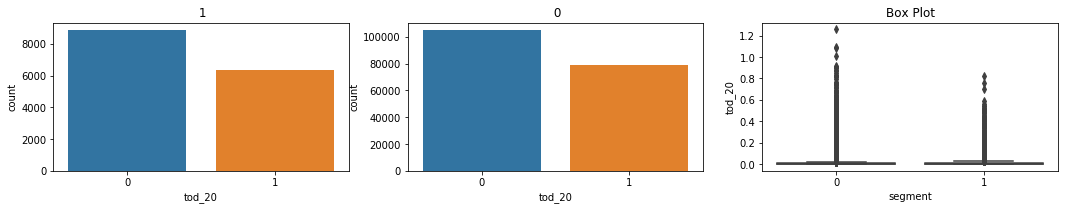

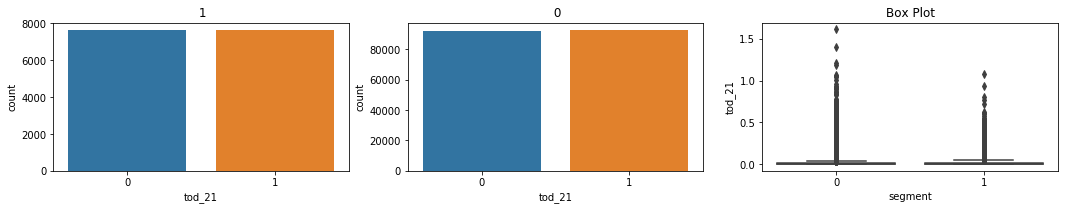

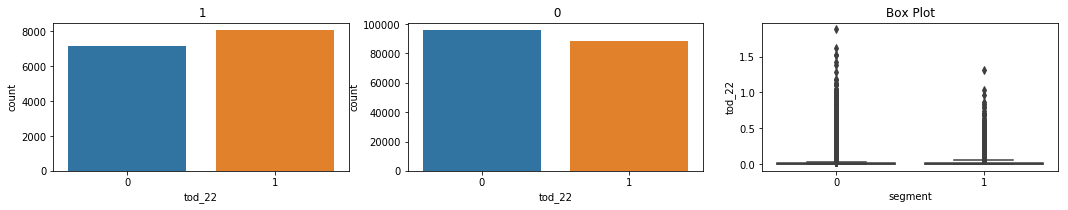

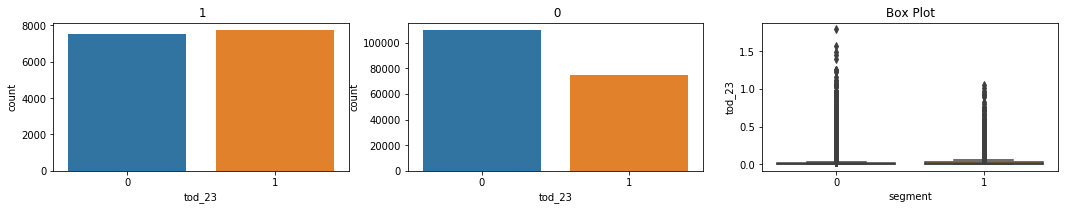

KeyError: 'genre_counts'

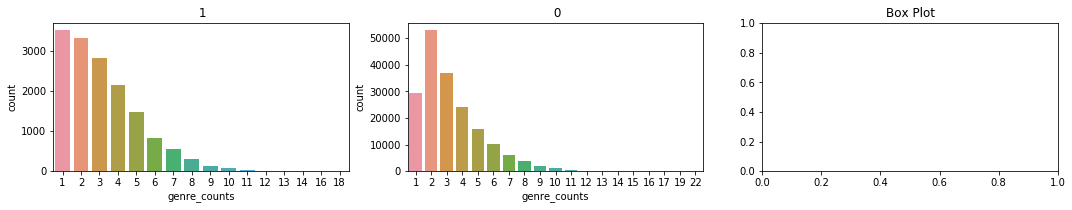

In [33]:
for col in train_data_count.columns:
  plt.figure(1,figsize=(18,6))  
  plt.subplot(231)
  plt.title(' 1')
  sns.countplot(train_data_count[col][train_data_count['segment'] == 1])
  plt.subplot(232)
  plt.title(' 0')
  sns.countplot(train_data_count[col][train_data_count['segment'] == 0])
  plt.subplot(233)
  plt.title('Box Plot')
  sns.boxplot(x = train_data.segment,y=train_data[col]/100000) 
  plt.show()

In [ ]:
#for col in train_data_count.columns:
#  sns.countplot(train_data_count[col][train_data_count['segment'] == 0])
#  plt.show()

In [34]:
train_data['total_time_spent'] = train_data[list(genreSet)].sum(axis=1)

In [35]:
train_data['total_time_spent'] = train_data['total_time_spent']/3600 

In [36]:
train_data['total_time_spent'].astype(np.int,inplace = True)

train-121672     0
train-121673    23
train-121670     8
train-121671     1
train-121676     2
train-121677     0
train-121674     8
train-121675     1
train-121678     8
train-121679     0
train-199734     4
train-193747    50
train-123292     0
train-123293     0
train-123290     1
train-123291    18
train-123296     1
train-123297     6
train-123294     0
train-123295    12
train-123298     0
train-123299    57
train-38089      2
train-110283     2
train-110282     1
train-110281    15
train-110280     4
train-110287     6
train-110286     8
train-110285    80
                ..
train-90198      1
train-90191      6
train-90190      0
train-90193     17
train-90192      2
train-90195     14
train-90194      1
train-90197      0
train-90196     48
train-29508      7
train-29509      0
train-178002    19
train-29502      0
train-29503      2
train-29500      0
train-29501      3
train-29506      3
train-29507      5
train-29504      3
train-29505      0
train-126321     0
train-126320

In [37]:
train_data['total_time_spent'].describe()

count    200000.000000
mean          5.901987
std          12.822070
min           0.000278
25%           0.428611
50%           1.873056
75%           5.920347
max         556.647778
Name: total_time_spent, dtype: float64

In [38]:
#train_data['total_time_spent_except_Cricket'] = train_data['total_time_spent'] - train_data['Cricket']
genreList = list(genreSet)
genreList.remove('Cricket')

In [39]:
train_data['total_time_spent_except_Cricket'] = train_data[genreList].sum(axis=1)

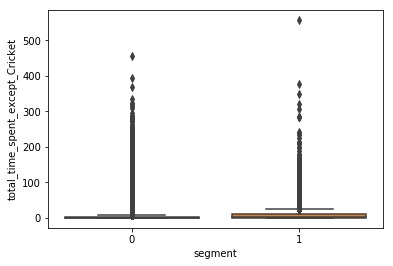

In [40]:
sns.boxplot(x=train_data['segment'],y=train_data['total_time_spent_except_Cricket']/3600)

In [41]:
sum_data = train_data_count.drop(['genre_counts','segment'],axis=1).sum(axis=0)

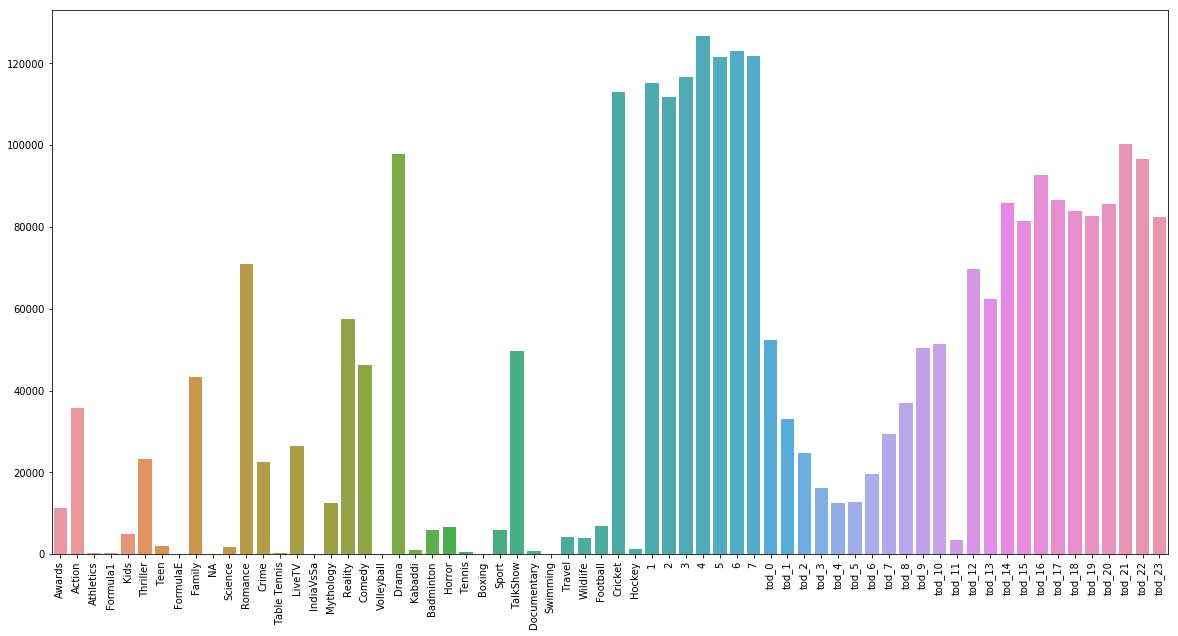

In [42]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(y = sum_data.values,x=sum_data.index)

From the above graphs, It is visible that
1. Cricket,Drama,Romance,Reality,TalkShow,Family,Comedy are one of the favorite Genres and people tend to watch them more. Where Cricket is the top watched genre.
2. People watch more on Hotstar on 4th day of a week and less on 2nd Day of a week.
3. People tend to watch more on Hotstar on second half of the day.
4. Segment point of view, 


1.   Romance, Drama , Family and Talkshow are more contributor for positive segment
2.   Hour 14,15,16,17,21,22,23 are more contributing for positive segment







